In [8]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('human_QC.log', comment='#', sep='\t')
df['passed_id'] = df.identity > 0.9
df['passed_aligned'] = df.fraction_aligned > 0.8
df.passed_id = df.passed_id.astype(int)
df.passed_aligned = df.passed_aligned.astype(int)
# df = df[['read_ID', 'passed_QC', 'primary_mapped', 'passed_id', 'passed_aligned']]


In [22]:
def plot_frac_aligned(df):
    temp = df.loc[(df.passed_QC==0)&(df.primary_mapped==1)&(df.passed_id==1)&(df.passed_aligned==1)]
    sns.set_context('paper', font_scale=2)    
    ax = sns.displot(data=df, x='fraction_aligned',
                     kind='kde', linewidth=3)
    ax.set(xlabel='Fraction of read aligned', ylabel='KDE of reads',
          xlim=(0,1.25),
          xticks=[0, .25, .50, .75, 1.0])

In [14]:
temp = df[['read_ID', 'passed_QC', 'primary_mapped', 'passed_id', 'passed_aligned']].groupby(['passed_QC', 'primary_mapped', 'passed_id', 'passed_aligned']).count().reset_index()
temp

,passed_QC,primary_mapped,passed_id,passed_aligned,read_ID
0,0,1,0,0,1247
1,0,1,0,1,16243
2,0,1,1,0,205328
3,0,1,1,1,189910
4,1,1,0,1,12429
5,1,1,1,1,18448380


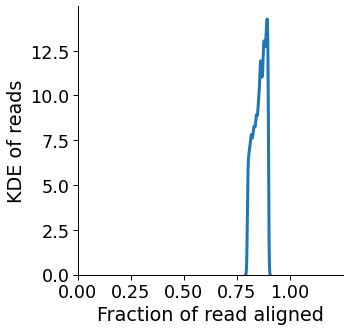

In [20]:
# reads that didn't pass QC but should have
temp = df.loc[(df.passed_QC==0)&(df.primary_mapped==1)&(df.passed_id==1)&(df.passed_aligned==1)]
plot_frac_aligned(temp)

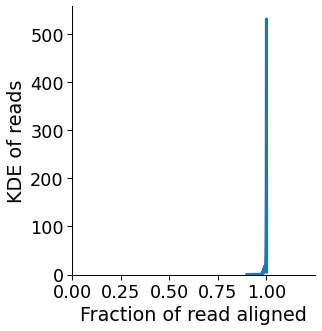

In [ ]:
# reads that passed QC
temp = df.loc[df.passed_QC ==  1]
plot_frac_aligned(temp)

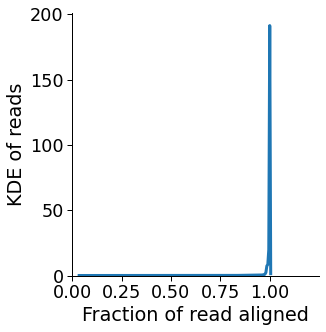

In [23]:
# all reads
plot_frac_aligned(df)

In [25]:
def plot_id(df):
    sns.set_context('paper', font_scale=2)    
    ax = sns.displot(data=df, x='identity',
                     kind='kde', linewidth=3)
    ax.set(xlabel='Read identity', ylabel='KDE of reads',
          xlim=(0,1),
          xticks=[0, .25, .50, .75, 1.0])

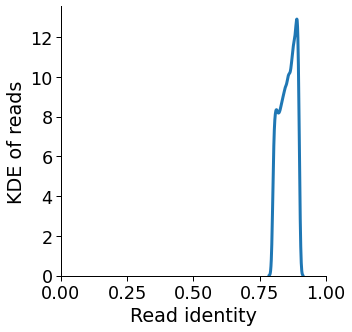

In [26]:
# reads that passed QC but shouldn't have??
temp = df.loc[(df.passed_QC==1)&(df.primary_mapped==1)&(df.passed_id==0)&(df.passed_aligned==1)]
plot_id(temp)

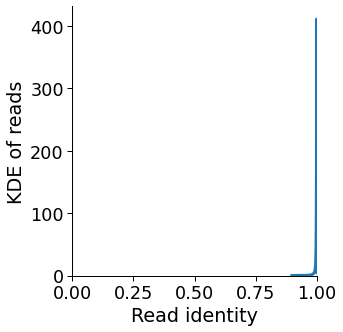

In [27]:
# reads that didn't pass QC but should have
temp = df.loc[(df.passed_QC==0)&(df.primary_mapped==1)&(df.passed_id==1)&(df.passed_aligned==1)]
plot_id(temp)

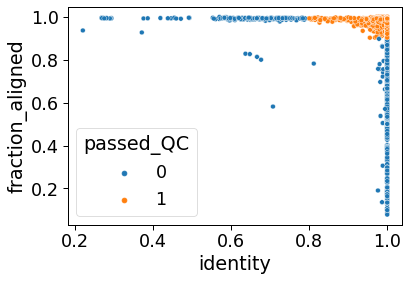

In [33]:
sns.scatterplot(data=temp, x='identity', y='fraction_aligned', hue='passed_QC')

In [32]:
temp = df.head(1000000)

In [35]:
len(temp.index)

189910

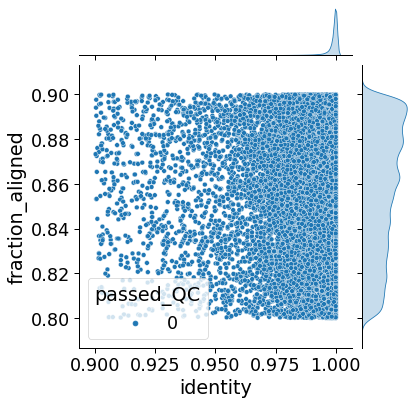

In [37]:
temp = df.loc[(df.passed_QC==0)&(df.passed_id==1)&(df.passed_aligned==1)&(df.primary_mapped==1)]
sns.jointplot(data=temp, x='identity', y='fraction_aligned', hue='passed_QC')

412728


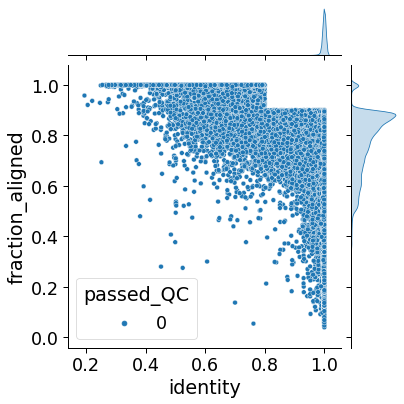

In [39]:
temp = df.loc[(df.passed_QC==0)]
print(len(temp.index))
sns.jointplot(data=temp, x='identity', y='fraction_aligned', hue='passed_QC')